<a href="https://colab.research.google.com/github/plissonf/RIIAA5.0_Workshop/blob/main/Building_%26_interpreting_Deep_AmPEP30_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Predicting the antimicrobial activity of short-length peptides**

Notebook by [Dr. Fabien Plisson](https://github.com/plissonf) and [MSc. Daniel Aldas](https://github.com/DanielAldas/)

[Original Paper](https://doi.org/10.1016/j.omtn.2020.05.006)

[Dataset](https://cbbio.online/AxPEP/?action=dataset)

#Downgrade sklearn

In [1]:
! pip uninstall -y scikit-learn

Found existing installation: scikit-learn 1.0.2
Uninstalling scikit-learn-1.0.2:
  Successfully uninstalled scikit-learn-1.0.2


In [2]:
! pip install scikit-learn==0.23.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.8 MB 6.6 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.5 requires scikit-learn>=1.0.0, but you have scikit-learn 0.23.1 which is incompatible.
imbalanced-learn 0.8.1 requires scikit-learn>=0.24, but you have scikit-learn 0.23.1 which is incompatible.


In [3]:
import sklearn
sklearn.__version__

'0.23.1'

# **Install Conda on Google Colab**

In [4]:
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2022-09-30 15:24:12--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8203, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’

Miniconda3-py37_4.8 100%[===================>]  81.12M   131MB/s    in 0.6s    

2022-09-30 15:24:13 (131 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: \ | / - \ | done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.3.0=py37_0
    - ca-certificates==2020.1.1=0
    - certifi==2019.11.28=py37_0
    - cffi==1.14.0=py37h2e261b9_0
    - chardet==3.0.4=py37_1003
    - conda-package-handl

# **Download and Install Pfeature (variables)**

In [5]:
! wget https://github.com/raghavagps/Pfeature/raw/master/PyLib/Pfeature.zip

--2022-09-30 15:24:36--  https://github.com/raghavagps/Pfeature/raw/master/PyLib/Pfeature.zip
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/raghavagps/Pfeature/master/PyLib/Pfeature.zip [following]
--2022-09-30 15:24:36--  https://raw.githubusercontent.com/raghavagps/Pfeature/master/PyLib/Pfeature.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519460 (507K) [application/zip]
Saving to: ‘Pfeature.zip’

Pfeature.zip        100%[===================>] 507.29K  --.-KB/s    in 0.03s   

2022-09-30 15:24:36 (15.0 MB/s) - ‘Pfeature.zip’ saved [519460/519460]



In [6]:
! unzip Pfeature.zip

Archive:  Pfeature.zip
   creating: Pfeature/
  inflating: Pfeature/PKG-INFO       
   creating: __MACOSX/
   creating: __MACOSX/Pfeature/
  inflating: __MACOSX/Pfeature/._PKG-INFO  
  inflating: Pfeature/README         
  inflating: __MACOSX/Pfeature/._README  
  inflating: Pfeature/setup.py       
  inflating: __MACOSX/Pfeature/._setup.py  
  inflating: Pfeature/Functions_Tables.pdf  
  inflating: __MACOSX/Pfeature/._Functions_Tables.pdf  
   creating: Pfeature/build/
   creating: Pfeature/build/lib/
   creating: Pfeature/build/lib/Pfeature/
  inflating: Pfeature/build/lib/Pfeature/bonds.csv  
   creating: __MACOSX/Pfeature/build/
   creating: __MACOSX/Pfeature/build/lib/
   creating: __MACOSX/Pfeature/build/lib/Pfeature/
  inflating: __MACOSX/Pfeature/build/lib/Pfeature/._bonds.csv  
  inflating: Pfeature/build/lib/Pfeature/pfeature.py  
  inflating: __MACOSX/Pfeature/build/lib/Pfeature/._pfeature.py  
  inflating: Pfeature/build/lib/Pfeature/AAIndexNames.csv  
  inflating: __MACOSX

In [7]:
%cd Pfeature

/content/Pfeature


In [8]:
! python setup.py install

/usr/local/lib/python3.7/distutils/dist.py:274: UserWarning: Unknown distribution option: 'zip_safe'
  warnings.warn(msg)
running install
running build
running build_py
copying Pfeature/pfeature.py -> build/lib/Pfeature
copying Pfeature/__init__.py -> build/lib/Pfeature
error: can't copy 'Pfeature/ONTAINER-LICENSE': doesn't exist or not a regular file


#Install modlAMP


In [9]:
! pip install modlamp


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 8.0 MB 6.7 MB/s 
     |████████████████████████████████| 154 kB 47.3 MB/s 
     |████████████████████████████████| 15.7 MB 43.7 MB/s 
     |████████████████████████████████| 38.1 MB 233 kB/s 
     |████████████████████████████████| 11.2 MB 26.1 MB/s 
     |████████████████████████████████| 24.8 MB 1.6 MB/s 
     |████████████████████████████████| 11.3 MB 6.9 MB/s 
     |████████████████████████████████| 6.4 MB 32.4 MB/s 
     |████████████████████████████████| 297 kB 56.8 MB/s 
     |████████████████████████████████| 13.1 MB 38.5 MB/s 
     |████████████████████████████████| 1.1 MB 51.9 MB/s 
     |████████████████████████████████| 40 kB 6.1 MB/s 
     |████████████████████████████████| 959 kB 62.6 MB/s 
     |████████████████████████████████| 98 kB 7.3 MB/s 
     |████████████████████████████████| 3.1 MB 30.6 MB/s 
     |███████████████████████████

#Biopython

In [10]:
! pip install biopython


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.3 MB 6.9 MB/s 


# **Install CD-HIT**

In [11]:
! conda install -c bioconda cd-hit -y

Solving environment: / - \ | / - \ | / - \ done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - cd-hit


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2022.07.19 |       h06a4308_0         124 KB
    cd-hit-4.8.1               |       hdbcaa40_0         221 KB  bioconda
    certifi-2022.9.14          |   py37h06a4308_0         155 KB
    conda-22.9.0               |   py37h06a4308_0         878 KB
    openssl-1.1.1q             |       h7f8727e_0         2.5 MB
    toolz-0.11.2               |     pyhd3eb1b0_0          49 KB
    ------------------------------------------------------------
                                           Total:         3.9 MB

The following NEW packages will be INSTALLED:

  cd-hit             bioconda/linux-64::cd-hit-4.8.1-hdbcaa40_0
  toolz              pkgs/main/noarch::toolz-0.

# **Load peptide dataset**

In [12]:
! wget https://raw.githubusercontent.com/plissonf/RIIAA5.0_Workshop/main/train_set/train_po.fasta

--2022-09-30 15:25:54--  https://raw.githubusercontent.com/plissonf/RIIAA5.0_Workshop/main/train_set/train_po.fasta
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 52619 (51K) [text/plain]
Saving to: ‘train_po.fasta’

train_po.fasta      100%[===================>]  51.39K  --.-KB/s    in 0.007s  

2022-09-30 15:25:54 (7.68 MB/s) - ‘train_po.fasta’ saved [52619/52619]



In [13]:
! wget https://raw.githubusercontent.com/plissonf/RIIAA5.0_Workshop/main/train_set/train_ne.fasta

--2022-09-30 15:25:55--  https://raw.githubusercontent.com/plissonf/RIIAA5.0_Workshop/main/train_set/train_ne.fasta
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 57206 (56K) [text/plain]
Saving to: ‘train_ne.fasta’

train_ne.fasta      100%[===================>]  55.87K  --.-KB/s    in 0.007s  

2022-09-30 15:25:55 (7.59 MB/s) - ‘train_ne.fasta’ saved [57206/57206]



In [14]:
! cat train_po.fasta

>amp5_30_1
ACSAG
>amp5_30_2
AMVGT
>amp5_30_3
AMVSS
>amp5_30_4
CPFVC
>amp5_30_5
SPGGA
>amp5_30_6
DDDDDD
>amp5_30_7
FRWWHR
>amp5_30_8
RKKWFW
>amp5_30_9
RRWWRF
>amp5_30_10
TVVTNA
>amp5_30_11
TVVTQA
>amp5_30_12
TVYTNA
>amp5_30_13
TVYTQA
>amp5_30_14
CSYTMEA
>amp5_30_15
GSEIQPR
>amp5_30_16
KVFLGLK
>amp5_30_17
LKLLKKL
>amp5_30_18
MRTGNAD
>amp5_30_19
MRTGNAN
>amp5_30_20
VISIIPV
>amp5_30_21
ASILTNAS
>amp5_30_22
FFFLSRIF
>amp5_30_23
FFHLHFHY
>amp5_30_24
KIIFLIAI
>amp5_30_25
PFKLSLHL
>amp5_30_26
QPFSLERW
>amp5_30_27
TCSYTMEA
>amp5_30_28
VAGRAQGM
>amp5_30_29
VRPYLVAF
>amp5_30_30
AHCLAIGRK
>amp5_30_31
ALLLAIRKR
>amp5_30_32
ALRLAIRKR
>amp5_30_33
ALWLAIRKR
>amp5_30_34
ALYLAIRKR
>amp5_30_35
AWKLFDDGV
>amp5_30_36
AWLLAIRKR
>amp5_30_37
DEKGPKWKR
>amp5_30_38
DYHHGVRVL
>amp5_30_39
EPFKISIHL
>amp5_30_40
EPFKLSLHL
>amp5_30_41
FLGFLHHLF
>amp5_30_42
FLGFLKNLF
>amp5_30_43
FLHFLHHLF
>amp5_30_44
GVCDMADLA
>amp5_30_45
GVVPHDFRI
>amp5_30_46
IAKVALKAL
>amp5_30_47
KIKFLKVLT
>amp5_30_48
NIPQLTPTP
>amp5_30_49
NRWCFAGD

In [15]:
! cat train_ne.fasta

>nonamp5_30_1
FPPWE
>nonamp5_30_2
FPPWM
>nonamp5_30_3
IEFFT
>nonamp5_30_4
RYLPT
>nonamp5_30_5
EDRTY
>nonamp5_30_6
FPPWVL
>nonamp5_30_7
GAPMFV
>nonamp5_30_8
KPPWRL
>nonamp5_30_9
NPTNLH
>nonamp5_30_10
DTVNAA
>nonamp5_30_11
MERQVL
>nonamp5_30_12
PIDPGV
>nonamp5_30_13
KPLWRL
>nonamp5_30_14
FGVLNFF
>nonamp5_30_15
GSEIQPR
>nonamp5_30_16
NNLDEIK
>nonamp5_30_17
VPPIGWF
>nonamp5_30_18
EAYAFGL
>nonamp5_30_19
TNDFMRF
>nonamp5_30_20
VIYIFAR
>nonamp5_30_21
DYMGWMDF
>nonamp5_30_22
GCVLLPWC
>nonamp5_30_23
MEDEGAGG
>nonamp5_30_24
SVQFKPRL
>nonamp5_30_25
DEVKIVLD
>nonamp5_30_26
SPPFAPRL
>nonamp5_30_27
TGVAWRIT
>nonamp5_30_28
PTHIKWGD
>nonamp5_30_29
MWPFPSDK
>nonamp5_30_30
EPFKISIHL
>nonamp5_30_31
GPDSSFLRL
>nonamp5_30_32
MAQDAITAV
>nonamp5_30_33
TLTSFGEWR
>nonamp5_30_34
CYIQNCPRG
>nonamp5_30_35
SQPSMRLRF
>nonamp5_30_36
TPTAFYGVR
>nonamp5_30_37
NPQQDFMRF
>nonamp5_30_38
MYKLLIINP
>nonamp5_30_39
AGQDGFMRF
>nonamp5_30_40
YDRYEVVYR
>nonamp5_30_41
CLIQDCPEG
>nonamp5_30_42
NQEGLFHGR
>nonamp5_30_43
GLVPPADKY
>

# **Remove redundant sequences using CD-HIT**

In [16]:
! cd-hit -i train_po.fasta -o train_po_cdhit.txt -c 0.99

Program: CD-HIT, V4.8.1, Mar 01 2019, 14:14:47
Command: cd-hit -i train_po.fasta -o train_po_cdhit.txt -c
         0.99

Started: Fri Sep 30 15:25:56 2022
                            Output                              
----------------------------------------------------------------
total seq: 1445
longest and shortest : 30 and 11
Total letters: 30071
Sequences have been sorted

Approximated minimal memory consumption:
Sequence        : 0M
Buffer          : 1 X 10M = 10M
Table           : 1 X 65M = 65M
Miscellaneous   : 0M
Total           : 76M

Table limit with the given memory limit:
Max number of representatives: 4000000
Max number of word counting entries: 90485873

comparing sequences from          0  to       1445
.
     1445  finished       1337  clusters

Approximated maximum memory consumption: 76M
writing new database
writing clustering information
program completed !

Total CPU time 0.09


In [17]:
! cd-hit -i train_ne.fasta -o train_ne_cdhit.txt -c 0.99

Program: CD-HIT, V4.8.1, Mar 01 2019, 14:14:47
Command: cd-hit -i train_ne.fasta -o train_ne_cdhit.txt -c
         0.99

Started: Fri Sep 30 15:25:56 2022
                            Output                              
----------------------------------------------------------------
total seq: 1445
longest and shortest : 30 and 11
Total letters: 30071
Sequences have been sorted

Approximated minimal memory consumption:
Sequence        : 0M
Buffer          : 1 X 10M = 10M
Table           : 1 X 65M = 65M
Miscellaneous   : 0M
Total           : 76M

Table limit with the given memory limit:
Max number of representatives: 4000000
Max number of word counting entries: 90485331

comparing sequences from          0  to       1445
.
     1445  finished       1422  clusters

Approximated maximum memory consumption: 76M
writing new database
writing clustering information
program completed !

Total CPU time 0.10


In [18]:
! ls -l

total 652
drwxr-xr-x 3 root root   4096 Jul 28 08:29 build
-rw-r--r-- 1 root root  86079 Sep 29  2020 Functions_Tables.pdf
drwxr-xr-x 2 root root   4096 Jul 28 08:32 Pfeature
-rw-r--r-- 1 root root 221146 Sep 29  2020 Pfeature_Descriptors.pdf
-rw-r--r-- 1 root root    971 Sep 28  2020 PKG-INFO
-rw-r--r-- 1 root root   1265 Sep 29  2020 README
-rw-r--r-- 1 root root   1267 Sep 29  2020 setup.py
-rw-r--r-- 1 root root  54341 Sep 30 15:25 train_ne_cdhit.txt
-rw-r--r-- 1 root root  61425 Sep 30 15:25 train_ne_cdhit.txt.clstr
-rw-r--r-- 1 root root  57206 Sep 30 15:25 train_ne.fasta
-rw-r--r-- 1 root root  47229 Sep 30 15:25 train_po_cdhit.txt
-rw-r--r-- 1 root root  56665 Sep 30 15:25 train_po_cdhit.txt.clstr
-rw-r--r-- 1 root root  52619 Sep 30 15:25 train_po.fasta


In [19]:
! grep ">" train_po_cdhit.txt | wc -l

1337


In [20]:
! grep ">" train_po.fasta | wc -l

1529


In [21]:
! grep ">" train_ne.fasta | wc -l

1529


In [22]:
! grep ">" train_ne_cdhit.txt | wc -l

1422


# **Calculate features using the Pfeature library**

Feature classes provided by Pfeature is summarized in the tables below.

**Composition Based Features**

Feature claass | Description | Function
---|---|---
AAC | Amino acid composition | aac_wp
DPC | Dipeptide composition | dpc_wp
TPC | Tripeptide composition | tpc_wp
ABC | Atom and bond composition | atc_wp, btc_wp
PCP | Physico-chemical properties | pcp_wp
AAI | Amino acid index composition | aai_wp
RRI | Repetitive Residue Information | rri_wp
DDR | Distance distribution of residues |ddr_wp
PRI | Physico-chemical properties repeat composition | pri_wp
SEP | Shannon entropy | sep_wp
SER | Shannon entropy of residue level | ser_wp
SPC | Shannon entropy of physicochemical property | spc_wp
ACR | Autocorrelation | acr_wp
CTC | Conjoint Triad Calculation | ctc_wp
CTD | Composition enhanced transition distribution | ctd_wp
PAAC | Pseudo amino acid composition | paac_wp
APAAC | Amphiphilic pseudo amino acid composition | apaac_wp
QSO | Quasi sequence order | qos_wp
SOC | Sequence order coupling | soc_wp

[Pfeature Manual](https://webs.iiitd.edu.in/raghava/pfeature/Pfeature_Manual.pdf)

### **Define functions for calculating the different features**

In [23]:
import pandas as pd
import numpy as np

In [24]:
# Amino acid composition (AAC)

from Pfeature.pfeature import aac_wp

def aac(input):
  a = input.rstrip('txt')
  output = a + 'aac.csv'
  df_out = aac_wp(input, output)
  df_in = pd.read_csv(output)
  return df_in

feature = aac('train_po_cdhit.txt')
feature

,AAC_A,AAC_C,AAC_D,AAC_E,AAC_F,AAC_G,AAC_H,AAC_I,AAC_K,AAC_L,AAC_M,AAC_N,AAC_P,AAC_Q,AAC_R,AAC_S,AAC_T,AAC_V,AAC_W,AAC_Y
0,27.27,0.00,9.09,0.00,9.09,9.09,0.00,0.00,0.00,0.00,0.00,9.09,9.09,0.00,0.00,0.00,0.00,18.18,0.00,9.09
1,0.00,54.55,0.00,9.09,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,18.18,18.18,0.00,0.00,0.00
2,0.00,0.00,9.09,18.18,9.09,9.09,9.09,0.00,0.00,9.09,9.09,0.00,18.18,0.00,0.00,0.00,0.00,9.09,0.00,0.00
3,0.00,0.00,0.00,18.18,9.09,9.09,9.09,0.00,0.00,9.09,9.09,9.09,18.18,0.00,0.00,0.00,0.00,9.09,0.00,0.00
4,0.00,0.00,9.09,18.18,18.18,9.09,0.00,0.00,0.00,9.09,9.09,9.09,18.18,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1332,10.00,0.00,3.33,3.33,6.67,20.00,0.00,3.33,13.33,13.33,3.33,0.00,0.00,3.33,0.00,6.67,3.33,10.00,0.00,0.00
1333,6.67,3.33,0.00,0.00,3.33,20.00,6.67,3.33,3.33,6.67,0.00,6.67,0.00,3.33,6.67,10.00,3.33,13.33,3.33,0.00
1334,13.33,0.00,0.00,3.33,0.00,3.33,13.33,0.00,0.00,10.00,0.00,0.00,16.67,6.67,16.67,6.67,3.33,0.00,0.00,6.67
1335,6.67,0.00,6.67,6.67,0.00,6.67,3.33,6.67,6.67,26.67,0.00,3.33,0.00,10.00,10.00,3.33,3.33,0.00,0.00,0.00


In [25]:
# Dipeptide composition (DPC)

from Pfeature.pfeature import dpc_wp

def dpc(input):
  a = input.rstrip('txt')
  output = a + 'dpc.csv'
  df_out = dpc_wp(input, output, 1)
  df_in = pd.read_csv(output)
  return df_in

# feature = dpc('train_po_cdhit.txt')
# feature

,DPC1_AA,DPC1_AC,DPC1_AD,DPC1_AE,DPC1_AF,DPC1_AG,DPC1_AH,DPC1_AI,DPC1_AK,DPC1_AL,...,DPC1_YM,DPC1_YN,DPC1_YP,DPC1_YQ,DPC1_YR,DPC1_YS,DPC1_YT,DPC1_YV,DPC1_YW,DPC1_YY
0,0.0,0.0,0.00,0.0,10.0,0.00,0.0,0.0,0.00,0.00,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1332,0.0,0.0,3.45,0.0,0.0,0.00,0.0,0.0,0.00,0.00,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1333,0.0,0.0,0.00,0.0,0.0,3.45,0.0,0.0,0.00,0.00,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1334,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,6.90,...,0.0,0.0,3.45,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1335,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,3.45,3.45,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
# Physico-Chemical Properties Composition (PCP)

from Pfeature.pfeature import pcp_wp

def pcp(input):
  a = input.rstrip('txt')
  output = a + 'pcp.csv'
  df_out = pcp_wp(input, output)
  df_in = pd.read_csv(output)
  return df_in

feature = pcp('train_po_cdhit.txt')
feature

,PCP_PC,PCP_NC,PCP_NE,PCP_PO,PCP_NP,PCP_AL,PCP_CY,PCP_AR,PCP_AC,PCP_BS,...,PCP_SA_EX,PCP_SA_IN,PCP_TN,PCP_SM,PCP_LR,PCP_Z1,PCP_Z2,PCP_Z3,PCP_Z4,PCP_Z5
0,0.000,0.091,0.909,0.091,0.727,0.636,0.091,0.182,0.091,0.000,...,0.273,0.182,0.364,0.818,0.182,-0.345,-0.827,0.489,-0.479,0.230
1,0.000,0.091,0.909,0.909,0.000,0.000,0.000,0.000,0.091,0.000,...,0.091,0.364,0.727,0.909,0.091,1.312,-1.478,2.019,-0.696,-1.419
2,0.091,0.273,0.636,0.000,0.636,0.455,0.182,0.091,0.273,0.091,...,0.455,0.364,0.091,0.455,0.545,-0.231,-0.213,0.410,-0.286,0.289
3,0.091,0.182,0.727,0.000,0.636,0.455,0.182,0.091,0.182,0.091,...,0.455,0.364,0.091,0.455,0.545,-0.315,-0.150,0.329,-0.167,0.075
4,0.000,0.273,0.727,0.000,0.636,0.364,0.182,0.182,0.273,0.000,...,0.545,0.273,0.091,0.455,0.545,-0.326,0.174,0.717,-0.619,0.080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1332,0.133,0.067,0.800,0.133,0.667,0.567,0.000,0.067,0.067,0.133,...,0.233,0.133,0.367,0.533,0.467,-0.117,-1.386,-0.471,-0.457,0.210
1333,0.167,0.000,0.833,0.200,0.567,0.500,0.000,0.067,0.000,0.167,...,0.133,0.200,0.400,0.633,0.367,0.409,-1.051,-0.271,-0.091,-0.116
1334,0.300,0.033,0.667,0.233,0.433,0.433,0.167,0.067,0.033,0.300,...,0.267,0.467,0.233,0.433,0.567,0.547,0.208,-0.331,0.521,0.531
1335,0.200,0.133,0.667,0.167,0.467,0.467,0.000,0.000,0.133,0.200,...,0.333,0.100,0.167,0.300,0.700,0.193,-0.438,-0.942,-0.518,0.364


### **Calculate feature for both positive and negative classes + combines the two classes + merge with class labels**

In [27]:
pos = 'train_po_cdhit.txt'
neg = 'train_ne_cdhit.txt'

def feature_calc(po, ne, feature_name):
  # Calculate feature
  po_feature = feature_name(po)
  ne_feature = feature_name(ne)
  # Create class labels
  po_class = pd.Series(['positive' for i in range(len(po_feature))])
  ne_class = pd.Series(['negative' for i in range(len(ne_feature))])
  # Combine po and ne
  po_ne_class = pd.concat([po_class, ne_class], axis=0)
  po_ne_class.name = 'class'
  po_ne_feature = pd.concat([po_feature, ne_feature], axis=0)
  # Combine feature and class
  df = pd.concat([po_ne_feature, po_ne_class], axis=1)
  return df


In [28]:
feature_aac = feature_calc(pos, neg, aac) # AAC
feature_dpc = feature_calc(pos, neg, dpc) # DPC
feature_pcp = feature_calc(pos, neg, pcp) # PCP 

In [29]:
feature_aac

,AAC_A,AAC_C,AAC_D,AAC_E,AAC_F,AAC_G,AAC_H,AAC_I,AAC_K,AAC_L,...,AAC_N,AAC_P,AAC_Q,AAC_R,AAC_S,AAC_T,AAC_V,AAC_W,AAC_Y,class
0,27.27,0.00,9.09,0.00,9.09,9.09,0.00,0.00,0.00,0.00,...,9.09,9.09,0.00,0.00,0.00,0.00,18.18,0.0,9.09,positive
1,0.00,54.55,0.00,9.09,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,18.18,18.18,0.00,0.0,0.00,positive
2,0.00,0.00,9.09,18.18,9.09,9.09,9.09,0.00,0.00,9.09,...,0.00,18.18,0.00,0.00,0.00,0.00,9.09,0.0,0.00,positive
3,0.00,0.00,0.00,18.18,9.09,9.09,9.09,0.00,0.00,9.09,...,9.09,18.18,0.00,0.00,0.00,0.00,9.09,0.0,0.00,positive
4,0.00,0.00,9.09,18.18,18.18,9.09,0.00,0.00,0.00,9.09,...,9.09,18.18,0.00,0.00,0.00,0.00,0.00,0.0,0.00,positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1417,13.33,0.00,3.33,3.33,0.00,13.33,0.00,3.33,26.67,10.00,...,3.33,3.33,3.33,0.00,0.00,3.33,0.00,10.0,0.00,negative
1418,6.67,0.00,0.00,3.33,6.67,20.00,3.33,3.33,13.33,13.33,...,0.00,3.33,10.00,0.00,6.67,3.33,3.33,0.0,0.00,negative
1419,6.67,20.00,0.00,3.33,0.00,10.00,0.00,6.67,10.00,3.33,...,3.33,6.67,0.00,0.00,6.67,6.67,10.00,0.0,6.67,negative
1420,6.67,0.00,3.33,3.33,6.67,0.00,3.33,3.33,3.33,6.67,...,16.67,3.33,6.67,10.00,6.67,0.00,13.33,0.0,3.33,negative


In [30]:
feature_aac.columns

Index(['AAC_A', 'AAC_C', 'AAC_D', 'AAC_E', 'AAC_F', 'AAC_G', 'AAC_H', 'AAC_I',
       'AAC_K', 'AAC_L', 'AAC_M', 'AAC_N', 'AAC_P', 'AAC_Q', 'AAC_R', 'AAC_S',
       'AAC_T', 'AAC_V', 'AAC_W', 'AAC_Y', 'class'],
      dtype='object')

# **Data pre-processing**

In [31]:
feature_aac

,AAC_A,AAC_C,AAC_D,AAC_E,AAC_F,AAC_G,AAC_H,AAC_I,AAC_K,AAC_L,...,AAC_N,AAC_P,AAC_Q,AAC_R,AAC_S,AAC_T,AAC_V,AAC_W,AAC_Y,class
0,27.27,0.00,9.09,0.00,9.09,9.09,0.00,0.00,0.00,0.00,...,9.09,9.09,0.00,0.00,0.00,0.00,18.18,0.0,9.09,positive
1,0.00,54.55,0.00,9.09,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,18.18,18.18,0.00,0.0,0.00,positive
2,0.00,0.00,9.09,18.18,9.09,9.09,9.09,0.00,0.00,9.09,...,0.00,18.18,0.00,0.00,0.00,0.00,9.09,0.0,0.00,positive
3,0.00,0.00,0.00,18.18,9.09,9.09,9.09,0.00,0.00,9.09,...,9.09,18.18,0.00,0.00,0.00,0.00,9.09,0.0,0.00,positive
4,0.00,0.00,9.09,18.18,18.18,9.09,0.00,0.00,0.00,9.09,...,9.09,18.18,0.00,0.00,0.00,0.00,0.00,0.0,0.00,positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1417,13.33,0.00,3.33,3.33,0.00,13.33,0.00,3.33,26.67,10.00,...,3.33,3.33,3.33,0.00,0.00,3.33,0.00,10.0,0.00,negative
1418,6.67,0.00,0.00,3.33,6.67,20.00,3.33,3.33,13.33,13.33,...,0.00,3.33,10.00,0.00,6.67,3.33,3.33,0.0,0.00,negative
1419,6.67,20.00,0.00,3.33,0.00,10.00,0.00,6.67,10.00,3.33,...,3.33,6.67,0.00,0.00,6.67,6.67,10.00,0.0,6.67,negative
1420,6.67,0.00,3.33,3.33,6.67,0.00,3.33,3.33,3.33,6.67,...,16.67,3.33,6.67,10.00,6.67,0.00,13.33,0.0,3.33,negative


In [32]:
# Assigns the features to X and class label to Y
X = feature_aac.drop('class', axis=1)
y = feature_aac['class'].copy()

In [33]:
# Encoding the Y class label
y = y.map({"positive": 1, "negative": 0})  

In [34]:
X.shape

(2759, 20)

# **Quickly compare ~30 ML algorithms**

In [35]:
! pip install lazypredict

In [36]:
# Import libraries
import lazypredict
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import matthews_corrcoef

# Load dataset
X = feature_aac.drop('class', axis=1)
y = feature_aac['class'].copy()

# Data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state =42, stratify=y)

# Defines and builds the lazyclassifier
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=matthews_corrcoef, predictions=True)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

100%|██████████| 29/29 [00:09<00:00,  3.09it/s]


In [37]:
# Prints the model performance
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,matthews_corrcoef,Time Taken
Model,,,,,,
NuSVC,0.75,0.76,None,0.75,0.52,0.64
SVC,0.75,0.75,None,0.75,0.50,0.54
XGBClassifier,0.73,0.73,None,0.73,0.47,0.54
KNeighborsClassifier,0.73,0.73,None,0.73,0.46,0.18
QuadraticDiscriminantAnalysis,0.72,0.72,None,0.72,0.44,0.09
AdaBoostClassifier,0.71,0.71,None,0.71,0.43,0.40
CalibratedClassifierCV,0.71,0.71,None,0.71,0.42,0.91
LogisticRegression,0.71,0.71,None,0.71,0.42,0.07
LGBMClassifier,0.71,0.71,None,0.71,0.42,0.39


[(0.0, 1.0)]

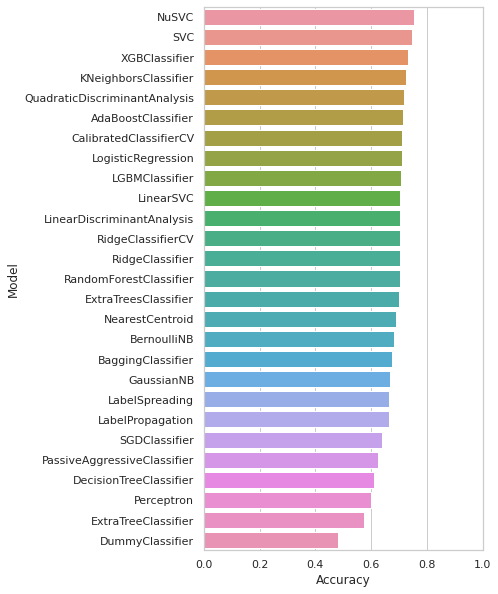

In [38]:
# Plot of Accuracy
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=models.index, x="Accuracy", data=models)
ax.set(xlim=(0, 1))

[(0.0, 1.0)]

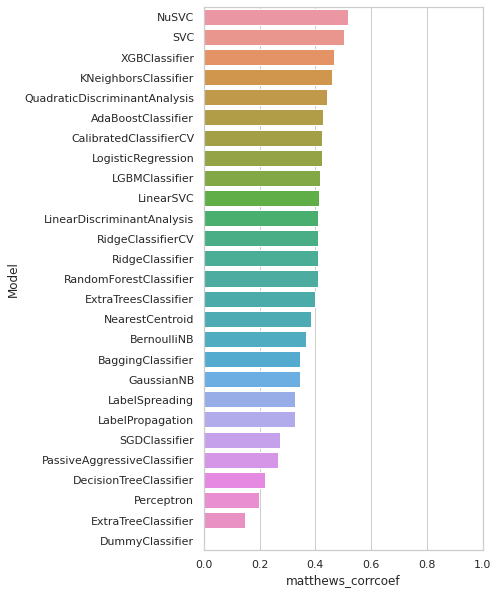

In [39]:
# Plot of MCC
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=models.index, x="matthews_corrcoef", data=models)
ax.set(xlim=(0, 1))

---

# **Nu-Support Vector Classification.**

In [40]:
# Build random forest model

from sklearn.svm import NuSVC


clf = NuSVC(gamma='scale')
clf.fit(X_train, y_train)

NuSVC()

### **Apply the model to make predictions**

In [41]:
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

### **Model performance**

In [42]:
predictions

,AdaBoostClassifier,BaggingClassifier,BernoulliNB,CalibratedClassifierCV,DecisionTreeClassifier,DummyClassifier,ExtraTreeClassifier,ExtraTreesClassifier,GaussianNB,KNeighborsClassifier,...,PassiveAggressiveClassifier,Perceptron,QuadraticDiscriminantAnalysis,RandomForestClassifier,RidgeClassifier,RidgeClassifierCV,SGDClassifier,SVC,XGBClassifier,LGBMClassifier
0,positive,positive,positive,positive,positive,negative,positive,positive,positive,positive,...,positive,negative,positive,positive,positive,positive,positive,positive,positive,positive
1,positive,negative,positive,positive,negative,positive,negative,negative,positive,positive,...,positive,positive,positive,negative,positive,positive,negative,positive,positive,positive
2,negative,negative,negative,negative,negative,positive,negative,negative,positive,negative,...,negative,negative,negative,negative,negative,negative,negative,negative,negative,negative
3,negative,positive,positive,positive,positive,positive,positive,positive,negative,positive,...,positive,negative,negative,positive,positive,positive,negative,positive,positive,positive
4,negative,negative,negative,negative,negative,negative,negative,negative,negative,negative,...,negative,negative,negative,negative,negative,negative,negative,negative,negative,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
547,negative,negative,positive,positive,positive,positive,positive,positive,positive,positive,...,positive,positive,positive,positive,positive,positive,negative,positive,positive,negative
548,positive,positive,positive,positive,positive,positive,positive,positive,positive,positive,...,positive,negative,positive,positive,positive,positive,negative,positive,positive,positive
549,positive,negative,positive,positive,positive,positive,negative,positive,positive,positive,...,positive,positive,positive,positive,positive,positive,positive,positive,positive,positive
550,positive,positive,positive,positive,positive,positive,positive,positive,positive,positive,...,positive,positive,positive,positive,positive,positive,positive,positive,positive,positive


In [43]:
# Simplest and quickest way to obtain the model performance (Accuracy)
clf.score(X_test,y_test)

0.7663043478260869

In [44]:
# Accuracy on train set
from sklearn.metrics import accuracy_score

accuracy_score(y_train, y_train_pred)

0.8495695514272769

In [45]:
# Accuracy on test set
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_test_pred)

0.7663043478260869

In [46]:
# Matthew Correlation Coefficient on train set
from sklearn.metrics import matthews_corrcoef

matthews_corrcoef(y_train, y_train_pred)

0.7072041513950893

In [47]:
# Matthew Correlation Coefficient on test set
from sklearn.metrics import matthews_corrcoef

matthews_corrcoef(y_test, y_test_pred)

0.5425510116072906

In [48]:
# Confusion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_test_pred)

array([[197,  88],
       [ 41, 226]])

In [49]:
# Classification report
from sklearn.metrics import classification_report

model_report = classification_report(y_train, y_train_pred, target_names=['positive','negative'])

f = open('model_report.txt','w')
f.writelines(model_report) 
f.close()

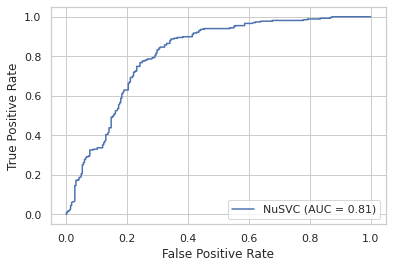

In [50]:
# ROC curve
import matplotlib.pyplot as plt
from sklearn.metrics import plot_roc_curve

plot_roc_curve(clf, X_test, y_test)  
plt.show()

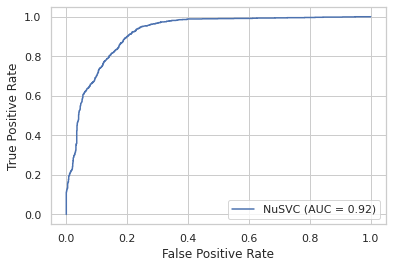

In [51]:
plot_roc_curve(clf, X_train, y_train)  
plt.show()

#Dipeptide features

In [52]:
# Assigns the features to X and class label to Y
X = feature_dpc.drop('class', axis=1)
y = feature_dpc['class'].copy()

In [53]:
# Encoding the Y class label
y = y.map({"positive": 1, "negative": 0})  

In [54]:
X.shape

(2759, 400)

In [55]:
# Feature selection (Variance threshold)
from sklearn.feature_selection import VarianceThreshold

fs = VarianceThreshold(threshold=0.1)
fs.fit_transform(X)
#X2.shape
X2 = X.loc[:, fs.get_support()]
X2

,DPC1_AA,DPC1_AC,DPC1_AD,DPC1_AE,DPC1_AF,DPC1_AG,DPC1_AH,DPC1_AI,DPC1_AK,DPC1_AL,...,DPC1_YL,DPC1_YM,DPC1_YN,DPC1_YP,DPC1_YQ,DPC1_YR,DPC1_YS,DPC1_YT,DPC1_YV,DPC1_YY
0,0.00,0.00,0.00,0.00,10.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1417,6.90,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.45,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1418,0.00,0.00,0.00,0.00,0.00,3.45,0.00,0.00,3.45,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1419,0.00,0.00,0.00,0.00,0.00,3.45,0.00,0.00,0.00,3.45,...,0.00,0.00,3.45,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1420,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,3.45,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [56]:
# Data split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.2, random_state =42, stratify=y)

In [57]:
# Import libraries
import lazypredict
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import matthews_corrcoef

# Load dataset
X = feature_dpc.drop('class', axis=1)
y = feature_dpc['class'].copy()

# Data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state =42, stratify=y)

# Defines and builds the lazyclassifier
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=matthews_corrcoef, predictions=True)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

100%|██████████| 29/29 [00:53<00:00,  1.86s/it]


In [58]:
# Prints the model performance (Training set)
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,matthews_corrcoef,Time Taken
Model,,,,,,
SVC,0.74,0.74,None,0.74,0.48,3.63
CalibratedClassifierCV,0.74,0.74,None,0.74,0.48,19.75
NuSVC,0.73,0.73,None,0.73,0.47,4.01
BernoulliNB,0.73,0.73,None,0.73,0.47,0.22
LinearDiscriminantAnalysis,0.73,0.73,None,0.73,0.46,1.05
RidgeClassifier,0.73,0.73,None,0.73,0.46,0.16
NearestCentroid,0.73,0.73,None,0.73,0.46,0.12
LinearSVC,0.73,0.73,None,0.73,0.45,3.60
RidgeClassifierCV,0.72,0.73,None,0.72,0.45,0.40


[(0.0, 1.0)]

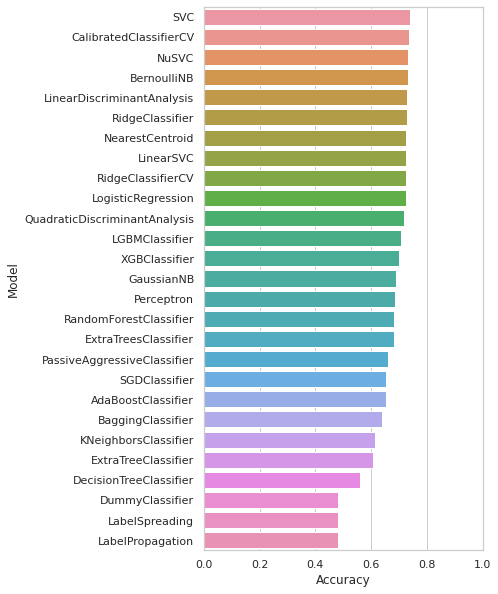

In [59]:
# Plot of Accuracy
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=models.index, x="Accuracy", data=models)
ax.set(xlim=(0, 1))

[(0.0, 1.0)]

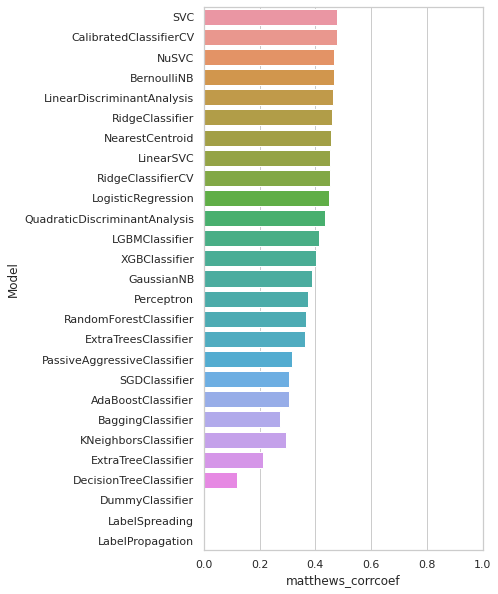

In [60]:
# Plot of MCC
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=models.index, x="matthews_corrcoef", data=models)
ax.set(xlim=(0, 1))

#NuSVC

In [61]:
# Build random forest model

from sklearn.svm import NuSVC


clf = NuSVC(gamma='scale')
clf.fit(X_train, y_train)

NuSVC()

In [62]:
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

In [63]:
feature_aac['class']

0       positive
1       positive
2       positive
3       positive
4       positive
          ...   
1417    negative
1418    negative
1419    negative
1420    negative
1421    negative
Name: class, Length: 2759, dtype: object

In [64]:
# Simplest and quickest way to obtain the model performance (Accuracy)
clf.score(X_test,y_test)

0.7282608695652174

In [65]:
# Accuracy on train set
from sklearn.metrics import accuracy_score

accuracy_score(y_train, y_train_pred)

0.9089261440869959

In [66]:
# Accuracy on test set
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_test_pred)

0.7282608695652174

In [67]:
# Matthew Correlation Coefficient on train set
from sklearn.metrics import matthews_corrcoef

matthews_corrcoef(y_train, y_train_pred)

0.8243257923248049

In [68]:
# Matthew Correlation Coefficient on test set
from sklearn.metrics import matthews_corrcoef

matthews_corrcoef(y_test, y_test_pred)

0.45807214665878176

In [69]:
# Confusion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_test_pred)

array([[201,  84],
       [ 66, 201]])

In [70]:
# Classification report
from sklearn.metrics import classification_report

model_report = classification_report(y_train, y_train_pred, target_names=['positive','negative'])

f = open('model_report.txt','w')
f.writelines(model_report) 
f.close()

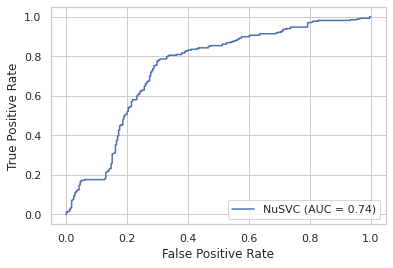

In [71]:
# ROC curve
import matplotlib.pyplot as plt
from sklearn.metrics import plot_roc_curve

plot_roc_curve(clf, X_test, y_test)  
plt.show()

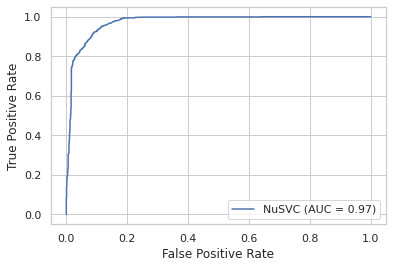

In [72]:
plot_roc_curve(clf, X_train, y_train)  
plt.show()

#PCP features

In [73]:
# # Assigns the features to X and class label to Y
X = feature_pcp.drop('class', axis=1)
y = feature_pcp['class'].copy()

In [74]:
# Encoding the Y class label
y = y.map({"positive": 1, "negative": 0})  

In [75]:
X.shape

(2759, 30)

In [76]:
# Import libraries
import lazypredict
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import matthews_corrcoef

# Load dataset
X = feature_pcp.drop('class', axis=1)
y = feature_pcp['class'].copy()

# Data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state =42, stratify=y)

# Defines and builds the lazyclassifier
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=matthews_corrcoef, predictions=True)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

100%|██████████| 29/29 [00:07<00:00,  4.02it/s]


In [77]:
# Prints the model performance (Training set)
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,matthews_corrcoef,Time Taken
Model,,,,,,
SVC,0.75,0.75,None,0.75,0.50,0.40
NuSVC,0.74,0.74,None,0.74,0.49,0.49
KNeighborsClassifier,0.72,0.72,None,0.71,0.44,0.13
LogisticRegression,0.71,0.71,None,0.71,0.43,0.11
CalibratedClassifierCV,0.71,0.71,None,0.71,0.42,1.23
XGBClassifier,0.71,0.71,None,0.71,0.42,0.34
LinearDiscriminantAnalysis,0.70,0.71,None,0.70,0.41,0.09
LinearSVC,0.70,0.71,None,0.70,0.41,0.34
RidgeClassifier,0.70,0.70,None,0.70,0.41,0.04


[(0.0, 1.0)]

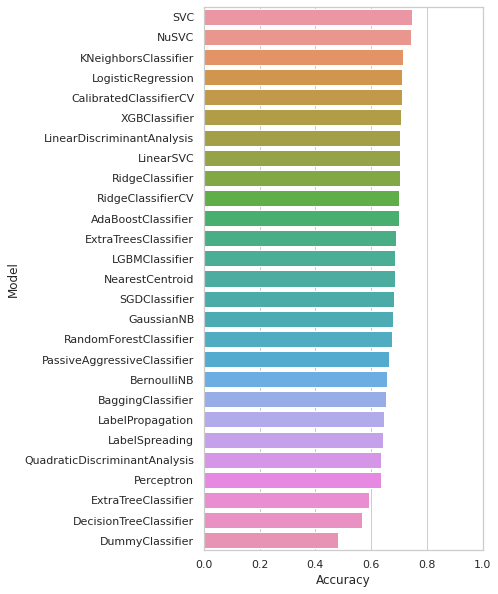

In [78]:
# Plot of Accuracy
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=models.index, x="Accuracy", data=models)
ax.set(xlim=(0, 1))

[(0.0, 1.0)]

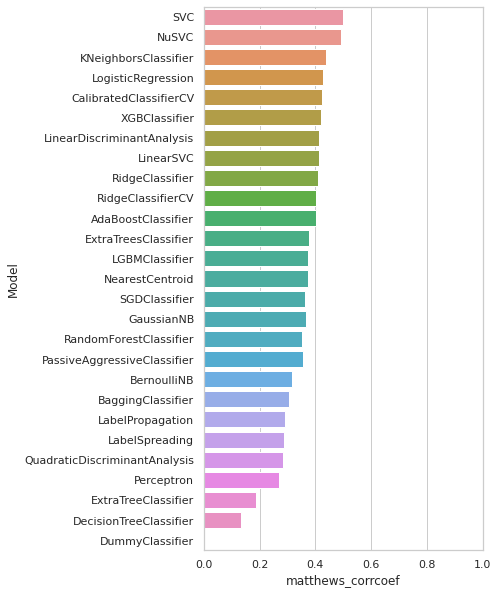

In [79]:
# Plot of MCC
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=models.index, x="matthews_corrcoef", data=models)
ax.set(xlim=(0, 1))

#NuSVC

In [80]:
# Build random forest model

from sklearn.svm import NuSVC


clf = NuSVC(gamma='scale')
clf.fit(X_train, y_train)

NuSVC()

In [81]:
X_train

,PCP_PC,PCP_NC,PCP_NE,PCP_PO,PCP_NP,PCP_AL,PCP_CY,PCP_AR,PCP_AC,PCP_BS,...,PCP_SA_EX,PCP_SA_IN,PCP_TN,PCP_SM,PCP_LR,PCP_Z1,PCP_Z2,PCP_Z3,PCP_Z4,PCP_Z5
1412,0.07,0.03,0.90,0.37,0.43,0.40,0.07,0.07,0.03,0.07,...,0.27,0.23,0.37,0.73,0.27,0.06,-1.07,0.52,-0.48,-0.59
1326,0.14,0.10,0.76,0.41,0.31,0.17,0.00,0.17,0.10,0.14,...,0.28,0.41,0.21,0.45,0.55,0.43,0.09,-0.11,-0.29,-0.03
1046,0.15,0.04,0.81,0.15,0.65,0.50,0.04,0.15,0.04,0.15,...,0.23,0.19,0.42,0.50,0.50,-0.31,-0.77,-0.09,-0.14,0.35
700,0.05,0.05,0.91,0.48,0.43,0.38,0.00,0.05,0.05,0.05,...,0.05,0.29,0.48,0.62,0.38,-0.04,-1.33,0.24,-0.53,-0.42
118,0.08,0.23,0.69,0.15,0.54,0.46,0.00,0.08,0.23,0.08,...,0.23,0.15,0.39,0.69,0.31,1.16,-1.38,-0.17,-0.96,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1224,0.39,0.14,0.46,0.14,0.25,0.21,0.04,0.07,0.14,0.39,...,0.57,0.18,0.14,0.43,0.57,1.64,0.19,-0.68,0.03,0.06
679,0.14,0.00,0.86,0.19,0.67,0.67,0.00,0.00,0.00,0.14,...,0.14,0.10,0.43,0.62,0.38,-0.39,-1.91,-0.46,-0.43,-0.04
1361,0.03,0.03,0.93,0.43,0.43,0.43,0.07,0.07,0.03,0.03,...,0.17,0.30,0.43,0.73,0.27,-0.05,-1.10,0.58,-0.52,-0.44
911,0.21,0.04,0.75,0.08,0.54,0.50,0.00,0.04,0.04,0.21,...,0.38,0.08,0.17,0.38,0.62,-0.07,-0.52,-0.69,-0.19,0.08


In [82]:
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

In [83]:
feature_aac['class']

0       positive
1       positive
2       positive
3       positive
4       positive
          ...   
1417    negative
1418    negative
1419    negative
1420    negative
1421    negative
Name: class, Length: 2759, dtype: object

In [84]:
# Simplest and quickest way to obtain the model performance (Accuracy)
clf.score(X_test,y_test)

0.7445652173913043

In [85]:
# Accuracy on train set
from sklearn.metrics import accuracy_score

accuracy_score(y_train, y_train_pred)

0.8210240144993204

In [86]:
# Accuracy on test set
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_test_pred)

0.7445652173913043

In [87]:
# Matthew Correlation Coefficient on train set
from sklearn.metrics import matthews_corrcoef

matthews_corrcoef(y_train, y_train_pred)

0.6487330584160682

In [88]:
# Matthew Correlation Coefficient on test set
from sklearn.metrics import matthews_corrcoef

matthews_corrcoef(y_test, y_test_pred)

0.4935617941655173

In [89]:
# Confusion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_test_pred)

array([[199,  86],
       [ 55, 212]])

In [90]:
# Classification report
from sklearn.metrics import classification_report

model_report = classification_report(y_train, y_train_pred, target_names=['positive','negative'])

f = open('model_report.txt','w')
f.writelines(model_report) 
f.close()

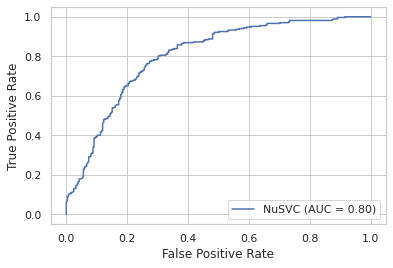

In [91]:
# ROC curve
import matplotlib.pyplot as plt
from sklearn.metrics import plot_roc_curve

plot_roc_curve(clf, X_test, y_test)  
plt.show()

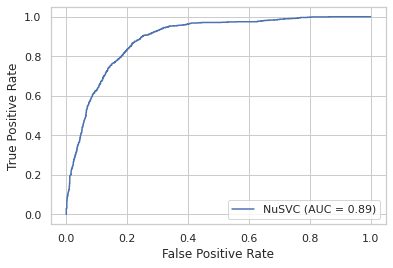

In [92]:
plot_roc_curve(clf, X_train, y_train)  
plt.show()

#ModlAMP features

In [93]:
from modlamp.descriptors import PeptideDescriptor, GlobalDescriptor

In [94]:
import sys
from Bio import SeqIO

In [95]:
def fasta_to_dataframe(file):
    """This function extracts identifier, sequence and sequence lenght from a fasta file and create a pandas DataFrame using this information"""

    with open(file) as fasta_file:
        identifiers = []
        seqs = []
        lenghts = []
        for seq_record in SeqIO.parse(fasta_file, 'fasta'): 
            identifiers.append(seq_record.id)
            seqs.append(str(seq_record.seq))
        
        d = {'id':identifiers, 'sequence':seqs}
        df = pd.DataFrame(data=d)
    return df

In [96]:
pos_df = fasta_to_dataframe(pos)
neg_df = fasta_to_dataframe(neg)

In [97]:
pos_seqs = pos_df.sequence.tolist()
neg_seqs = neg_df.sequence.tolist()

In [98]:
def molecular_descriptors(df='', sec=''):
  # Net charge
  desc=GlobalDescriptor(sec)
  desc.calculate_charge()
  charge=desc.descriptor
  df["Charge"]=charge
  # Isoelectric point (pH = 7)
  desc=GlobalDescriptor(sec)
  desc.isoelectric_point()
  isoelectric=desc.descriptor
  df["Isoelectric_point"]=isoelectric  
  # Aomaticity
  desc=GlobalDescriptor(sec)
  desc.aromaticity()
  aroma=desc.descriptor
  df["Aromaticity"]=aroma
  # Molecular weight
  desc=GlobalDescriptor(sec)
  desc.calculate_MW()
  MW=desc.descriptor
  df["Molecular_weight"]=MW
  # Aliphatic index
  desc=GlobalDescriptor(sec)
  desc.aliphatic_index()
  ali=desc.descriptor
  df["Aliphatic_index"]=ali
  # Hydrophobic ratio
  desc=GlobalDescriptor(sec)
  desc.hydrophobic_ratio()
  hidro=desc.descriptor
  df["Hydrophobic_ratio"]=hidro
  # AASI
  aasi=PeptideDescriptor(sec,"AASI")
  aasi.calculate_global()
  desc_aasi=aasi.descriptor
  df["AASI"]=desc_aasi
  # ABHPRK (modlabs inhouse physicochemical feature scale (Acidic, Basic, Hydrophobic, Polar, aRomatic, Kink-inducer)
  abh=PeptideDescriptor(sec,"ABHPRK")
  abh.calculate_global()
  desc_abh=abh.descriptor
  df["ABHPRK"]=desc_abh
  # Argos hydrophobicity amino acid scale
  argos=PeptideDescriptor(sec,"argos")
  argos.calculate_global()
  desc_argos=argos.descriptor
  df["Argos_hidrophobicity"]=desc_argos
  # Bulkiness
  bulk=PeptideDescriptor(sec,"bulkiness")
  bulk.calculate_global()
  desc_bulk=bulk.descriptor
  df["Bulkiness"]=desc_bulk
  # Charge pH 7
  char7=PeptideDescriptor(sec,"charge_phys")
  char7.calculate_global()
  desc_char7=char7.descriptor
  df["Charge_pH7"]=desc_char7
  #Ejemplo de calculo de un descriptor global de modlamp (Charge acid)
  chara=PeptideDescriptor(sec,"charge_acid")
  chara.calculate_global()
  desc_chara=chara.descriptor
  df["Charge_acid"]=desc_chara
  # Eisenberg_hydrophobicity
  eisen=PeptideDescriptor(sec,"eisenberg")
  eisen.calculate_global()
  desc_eisen=eisen.descriptor
  df["Eisenberg"]=desc_eisen
  # Energies of insertion)
  ez=PeptideDescriptor(sec,"Ez")
  ez.calculate_global()
  desc_ez=ez.descriptor
  df["Ez"]=desc_ez
  # Flexibility
  flex=PeptideDescriptor(sec,"flexibility")
  flex.calculate_global()
  desc_flex=flex.descriptor
  df["Flexibility"]=desc_flex
  # Amino acid side chain composition, polarity and molecular volume
  gran=PeptideDescriptor(sec,"grantham")
  gran.calculate_global()
  desc_gran=gran.descriptor
  df["Grantham"]=desc_gran
  # GRAVY hydrophobicity
  gravy=PeptideDescriptor(sec,"gravy")
  gravy.calculate_global()
  desc_gravy=gravy.descriptor
  df["Gravy"]=desc_gravy
  # Hopp-woods hydrophobicity
  hw=PeptideDescriptor(sec,"hopp-woods")
  hw.calculate_global()
  desc_hw=hw.descriptor
  df["Hopp_Woods"]=desc_hw
  # Isotropic Surface Area and Electronic Charge Index
  isaeci=PeptideDescriptor(sec,"ISAECI")
  isaeci.calculate_global()
  desc_isaeci=isaeci.descriptor
  df["ISAECI"]=desc_isaeci
  # Janin Hydrophobicity
  jan=PeptideDescriptor(sec,"janin")
  jan.calculate_global()
  desc_jan=jan.descriptor
  df["Janin_Hydrophobicity"]=desc_jan
  # kytedoolittle Hydrophobicity
  kd=PeptideDescriptor(sec,"kytedoolittle")
  kd.calculate_global()
  desc_kd=kd.descriptor
  df["Kytedoolittle_Hydrophobicity"]=desc_kd
  # topological shape and size MSS
  mss=PeptideDescriptor(sec,"MSS")
  mss.calculate_global()
  desc_mss=mss.descriptor
  df["MSS"]=desc_mss
  # PCA of the molecular surface
  msw=PeptideDescriptor(sec,"MSW")
  msw.calculate_global()
  desc_msw=msw.descriptor
  df["MSW"]=desc_msw
  # Pharmacophoric feature scale
  pA=PeptideDescriptor(sec,"pepArc")
  pA.calculate_global()
  desc_pA=pA.descriptor
  df["pepArc"]=desc_pA
  # Pharmacophoric feature based PEPCATS
  pc=PeptideDescriptor(sec,"pepcats")
  pc.calculate_global()
  desc_pc=pc.descriptor
  df["pepcats"]=desc_pc
  # Polarity
  pol=PeptideDescriptor(sec,"polarity")
  pol.calculate_global()
  desc_pol=pol.descriptor
  df["Polarity"]=desc_pol
  # PPCALI
  pcal=PeptideDescriptor(sec,"PPCALI")
  pcal.calculate_global()
  desc_pcal=pcal.descriptor
  df["PPCALI"]=desc_pcal
  # Refractivity
  ref=PeptideDescriptor(sec,"refractivity")
  ref.calculate_global()
  desc_ref=ref.descriptor
  df["Refractivity"]=desc_ref
  # t_scale
  tscale=PeptideDescriptor(sec,"t_scale")
  tscale.calculate_global()
  desc_tscale=tscale.descriptor
  df["t_scale"]=desc_tscale
  # Amino acid transmembrane propensity
  TM=PeptideDescriptor(sec,"TM_tend")
  TM.calculate_global()
  desc_TM=TM.descriptor
  df["Transmembrane_propensity"]=desc_TM
  # Three dimensional Z-scale
  z3=PeptideDescriptor(sec,"z3")
  z3.calculate_global()
  desc_z3=z3.descriptor
  df["3D_z-scale"]=desc_z3
  # Five dimensional Z-scale
  z5=PeptideDescriptor(sec,"z5")
  z5.calculate_global()
  desc_z5=z5.descriptor
  df["5D_z-scale"]=desc_z5
  return df

In [99]:
pepdesc_pos = molecular_descriptors(df = pos_df, sec=pos_seqs)

In [100]:
pepdesc_pos

,id,sequence,Charge,Isoelectric_point,Aromaticity,Molecular_weight,Aliphatic_index,Hydrophobic_ratio,AASI,ABHPRK,...,MSW,pepArc,pepcats,Polarity,PPCALI,Refractivity,t_scale,Transmembrane_propensity,3D_z-scale,5D_z-scale
0,amp5_30_85,AVPDVAFNAYG,-1.00,2.93,0.18,1123.22,80.00,0.55,2.03,0.91,...,-0.55,1.00,1.45,0.39,0.64,0.29,-11.82,0.00,-0.75,-0.64
1,amp5_30_86,CTTCECCCSCS,-1.41,3.15,0.00,1142.35,0.00,0.55,2.01,0.55,...,-0.71,1.09,2.55,0.30,-2.23,0.57,-7.02,-0.58,2.12,-0.26
2,amp5_30_87,EPHPDEFVGLM,-2.90,3.70,0.09,1270.41,61.82,0.36,2.15,1.36,...,-0.29,1.27,1.64,0.46,1.42,0.37,-1.20,-0.63,0.10,-0.03
3,amp5_30_88,EPHPNEFVGLM,-1.90,4.15,0.09,1269.43,61.82,0.36,2.08,1.27,...,-0.15,1.18,1.64,0.44,1.01,0.37,-3.14,-0.48,-0.05,0.06
4,amp5_30_89,EPNPDEFFGLM,-3.00,2.78,0.18,1295.42,35.45,0.36,2.01,1.36,...,-0.20,1.18,1.55,0.46,1.60,0.38,0.14,-0.60,0.43,0.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1332,amp5_30_1525,SLGSFMKGVGKGLATVGKIVADQFGKLLEA,2.00,10.26,0.07,3022.57,104.00,0.47,2.27,0.97,...,-0.53,1.00,1.37,0.40,0.54,0.30,-10.62,-0.14,-2.23,-2.22
1333,amp5_30_1526,SWFSRTVHNVGNAVRKGIHAGQGVCSGLGL,3.13,11.22,0.07,3108.50,84.33,0.37,2.28,0.93,...,-0.41,0.97,1.60,0.42,-0.43,0.33,-11.25,-0.14,-1.23,-0.91
1334,amp5_30_1527,TLQPPSALRRRHYHHALPPSRHYPGREAQA,4.39,11.54,0.07,3500.90,52.33,0.23,1.93,1.23,...,0.06,1.30,2.10,0.48,-2.00,0.38,-9.29,-0.87,0.67,1.48
1335,amp5_30_1528,TLRGDERILSILRHQNLLKELQDLALQGAK,1.10,9.82,0.00,3442.97,136.67,0.40,2.29,1.20,...,-0.20,1.27,1.70,0.46,-1.11,0.38,-0.49,-0.58,-0.99,-1.23


In [101]:
pepdesc_neg = molecular_descriptors(df = neg_df, sec=neg_seqs)

In [102]:
pepdesc_neg

,id,sequence,Charge,Isoelectric_point,Aromaticity,Molecular_weight,Aliphatic_index,Hydrophobic_ratio,AASI,ABHPRK,...,MSW,pepArc,pepcats,Polarity,PPCALI,Refractivity,t_scale,Transmembrane_propensity,3D_z-scale,5D_z-scale
0,nonamp5_30_85,GRGGSSNYVRL,2.00,10.98,0.09,1165.26,61.82,0.18,2.23,1.00,...,-0.37,0.91,1.64,0.46,-2.06,0.30,-14.05,-0.42,-0.82,-0.54
1,nonamp5_30_86,GSTGLIPFGRT,1.00,10.74,0.09,1105.25,70.91,0.27,1.99,0.91,...,-0.45,0.82,1.27,0.37,-0.69,0.28,-19.38,0.00,-2.31,-2.21
2,nonamp5_30_87,PAPESGFIRDP,-1.00,3.94,0.09,1185.29,44.55,0.27,1.73,1.18,...,-0.42,1.18,1.45,0.48,0.61,0.32,-12.46,-0.86,0.39,0.75
3,nonamp5_30_89,GASGLIPFPRL,1.00,10.74,0.09,1127.34,115.45,0.45,1.70,0.91,...,-0.36,0.91,1.18,0.32,-0.95,0.31,-18.18,0.15,-2.12,-1.52
4,nonamp5_30_90,SANTKNDFMRF,1.00,10.01,0.18,1330.47,9.09,0.36,2.16,1.36,...,-0.16,1.27,2.09,0.52,0.79,0.40,1.40,-0.70,0.77,1.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1417,nonamp5_30_1525,GWKDWLNKGKEWLKKKGPGIMKAALKAATQ,6.00,10.90,0.10,3383.03,65.33,0.30,2.21,1.17,...,-0.24,1.20,1.80,0.48,0.66,0.39,-4.35,-0.83,-0.72,-0.23
1418,nonamp5_30_1526,GLFKTLIKGAGKMLGHVAKQFLGSQGQPES,3.10,10.69,0.07,3128.66,81.33,0.37,2.26,1.00,...,-0.29,1.00,1.50,0.43,-0.29,0.32,-10.19,-0.36,-1.64,-1.47
1419,nonamp5_30_1527,GIPCGESCVYIPCTVTALAGCKCKSKVCYN,1.59,7.83,0.07,3111.73,74.67,0.47,2.01,0.83,...,-0.49,1.03,1.90,0.35,-1.12,0.42,-10.57,-0.33,-0.46,-1.33
1420,nonamp5_30_1528,SFSVNPAVDILQHRYMEKVAQNNRNFLNRV,2.10,10.41,0.10,3561.00,84.33,0.40,2.19,1.27,...,-0.08,1.23,1.93,0.47,-0.06,0.39,0.42,-0.50,-0.00,0.29


In [103]:
pepdesc_pos['class']=1
pepdesc_neg['class']=0

In [104]:
pepdesc_total = pd.concat([pepdesc_pos, pepdesc_neg])

In [105]:
pepdesc_total['class'].value_counts()

0    1422
1    1337
Name: class, dtype: int64

In [106]:
pepdesc_features = pepdesc_total.iloc[:,2:-1]
pepdesc_features

,Charge,Isoelectric_point,Aromaticity,Molecular_weight,Aliphatic_index,Hydrophobic_ratio,AASI,ABHPRK,Argos_hidrophobicity,Bulkiness,...,MSW,pepArc,pepcats,Polarity,PPCALI,Refractivity,t_scale,Transmembrane_propensity,3D_z-scale,5D_z-scale
0,-1.00,2.93,0.18,1123.22,80.00,0.55,2.03,0.91,0.03,0.61,...,-0.55,1.00,1.45,0.39,0.64,0.29,-11.82,0.00,-0.75,-0.64
1,-1.41,3.15,0.00,1142.35,0.00,0.55,2.01,0.55,-0.02,0.53,...,-0.71,1.09,2.55,0.30,-2.23,0.57,-7.02,-0.58,2.12,-0.26
2,-2.90,3.70,0.09,1270.41,61.82,0.36,2.15,1.36,0.10,0.66,...,-0.29,1.27,1.64,0.46,1.42,0.37,-1.20,-0.63,0.10,-0.03
3,-1.90,4.15,0.09,1269.43,61.82,0.36,2.08,1.27,0.11,0.66,...,-0.15,1.18,1.64,0.44,1.01,0.37,-3.14,-0.48,-0.05,0.06
4,-3.00,2.78,0.18,1295.42,35.45,0.36,2.01,1.36,0.19,0.65,...,-0.20,1.18,1.55,0.46,1.60,0.38,0.14,-0.60,0.43,0.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1417,6.00,10.90,0.10,3383.03,65.33,0.30,2.21,1.17,-0.04,0.61,...,-0.24,1.20,1.80,0.48,0.66,0.39,-4.35,-0.83,-0.72,-0.23
1418,3.10,10.69,0.07,3128.66,81.33,0.37,2.26,1.00,0.15,0.57,...,-0.29,1.00,1.50,0.43,-0.29,0.32,-10.19,-0.36,-1.64,-1.47
1419,1.59,7.83,0.07,3111.73,74.67,0.47,2.01,0.83,-0.05,0.61,...,-0.49,1.03,1.90,0.35,-1.12,0.42,-10.57,-0.33,-0.46,-1.33
1420,2.10,10.41,0.10,3561.00,84.33,0.40,2.19,1.27,-0.03,0.68,...,-0.08,1.23,1.93,0.47,-0.06,0.39,0.42,-0.50,-0.00,0.29


In [107]:
def normalize (df):
    normalized_df=df.copy()
    normalized_df=(df-df.min())/(df.max()-df.min())
    return normalized_df

In [108]:
features_norm = normalize(pepdesc_features)

In [109]:
features_norm.describe()

,Charge,Isoelectric_point,Aromaticity,Molecular_weight,Aliphatic_index,Hydrophobic_ratio,AASI,ABHPRK,Argos_hidrophobicity,Bulkiness,...,MSW,pepArc,pepcats,Polarity,PPCALI,Refractivity,t_scale,Transmembrane_propensity,3D_z-scale,5D_z-scale
count,2759.00,2759.00,2759.00,2759.00,2759.00,2759.00,2759.00,2759.00,2759.00,2759.00,...,2759.00,2759.00,2759.00,2759.00,2759.00,2759.00,2759.00,2759.00,2759.00,2759.00
mean,0.35,0.55,0.20,0.45,0.38,0.51,0.61,0.48,0.36,0.68,...,0.35,0.53,0.50,0.44,0.46,0.41,0.58,0.54,0.44,0.37
std,0.10,0.25,0.16,0.22,0.19,0.17,0.10,0.15,0.13,0.11,...,0.13,0.12,0.12,0.15,0.12,0.13,0.11,0.15,0.17,0.13
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.30,0.37,0.10,0.26,0.24,0.39,0.55,0.38,0.27,0.61,...,0.26,0.44,0.42,0.34,0.38,0.32,0.51,0.46,0.32,0.29
50%,0.34,0.67,0.18,0.45,0.38,0.52,0.62,0.46,0.35,0.68,...,0.33,0.53,0.49,0.44,0.46,0.40,0.57,0.54,0.44,0.37
75%,0.41,0.74,0.29,0.62,0.51,0.63,0.67,0.57,0.43,0.75,...,0.42,0.59,0.58,0.52,0.54,0.48,0.65,0.64,0.57,0.46
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


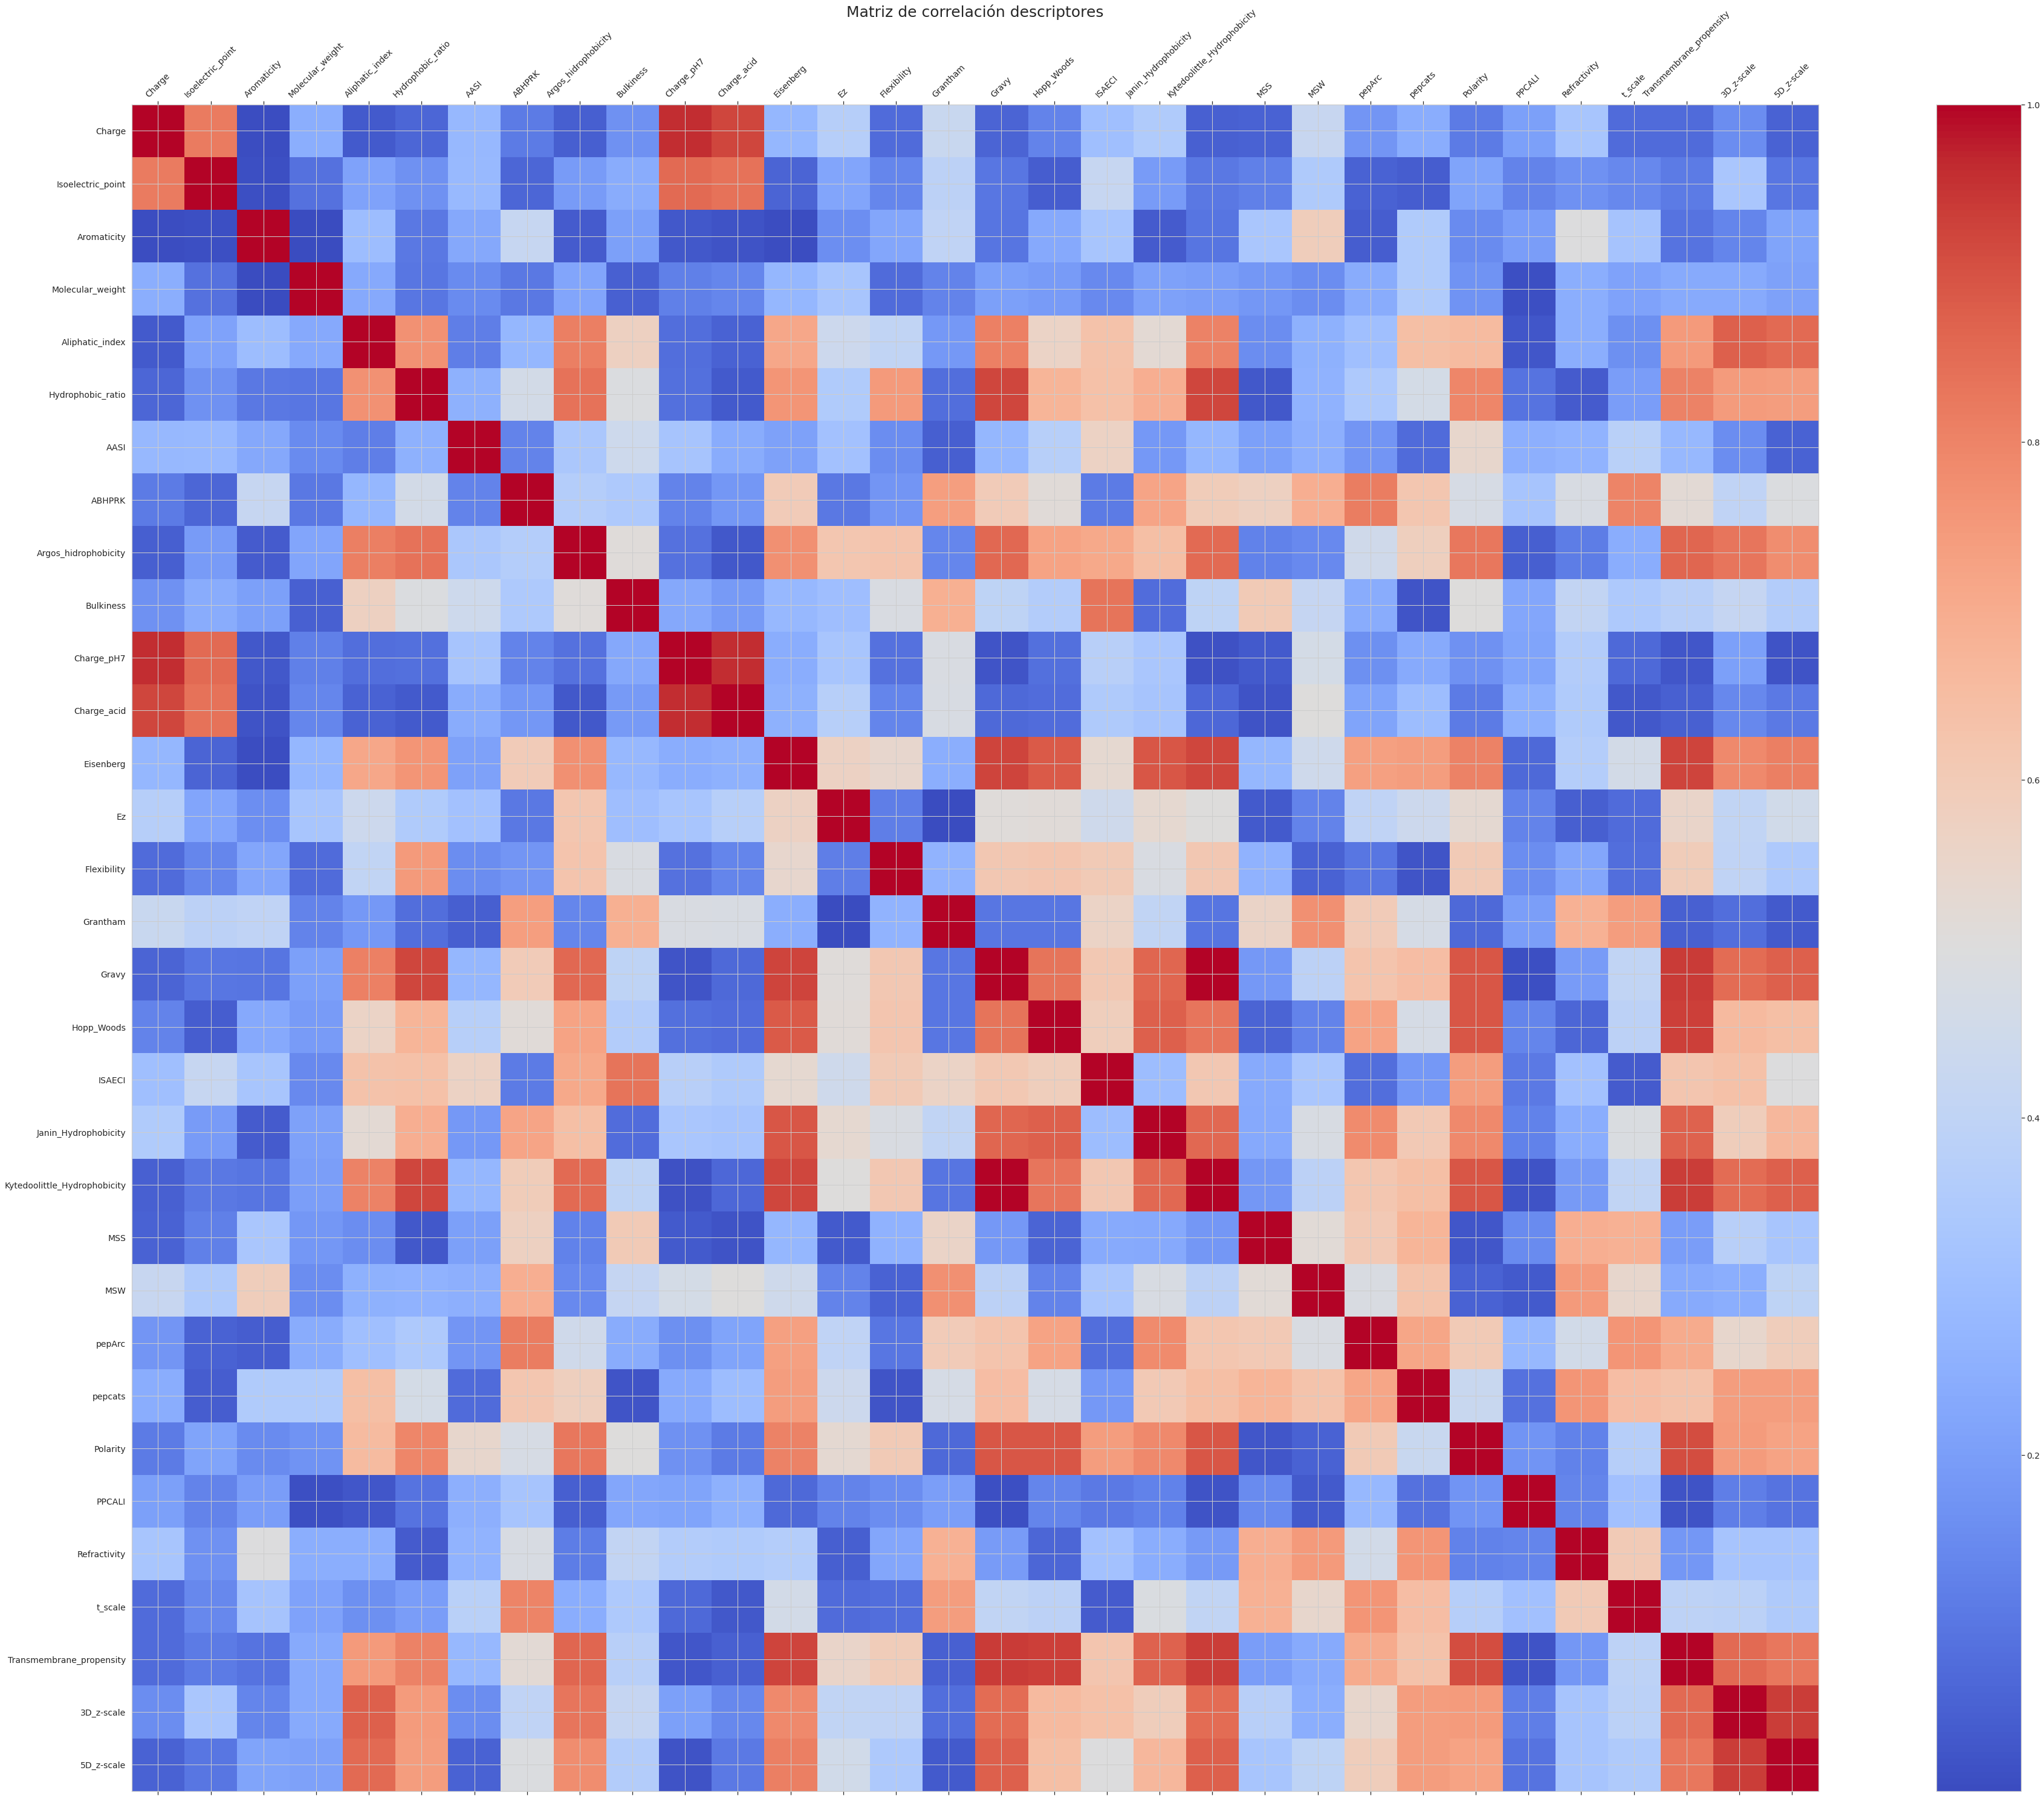

In [110]:
#Matriz de correlación normalizada
f = plt.figure(figsize=(70, 50))
plt.matshow(features_norm.corr().abs(), fignum=f.number, cmap=plt.get_cmap('coolwarm'))
plt.xticks(range(features_norm.select_dtypes(['number']).shape[1]), features_norm.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(features_norm.select_dtypes(['number']).shape[1]), features_norm.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Matriz de correlación descriptores', fontsize=25);

In [111]:
upper_tri = features_norm.corr().abs().where(np.triu(np.ones(features_norm.corr().abs().shape),k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
features_desc = features_norm.drop(to_drop, axis=1)

In [112]:
# Load dataset
X = features_desc
y = pepdesc_total['class'].copy()

# Data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state =42, stratify=y)

# Defines and builds the lazyclassifier
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=matthews_corrcoef, predictions=True)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

100%|██████████| 29/29 [00:07<00:00,  3.88it/s]


In [113]:
# Prints the model performance (Training set)
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,matthews_corrcoef,Time Taken
Model,,,,,,
NuSVC,0.76,0.76,0.76,0.76,0.53,0.48
SVC,0.75,0.75,0.75,0.75,0.50,0.38
KNeighborsClassifier,0.73,0.74,0.74,0.73,0.47,0.09
LinearSVC,0.71,0.71,0.71,0.71,0.43,0.30
XGBClassifier,0.71,0.71,0.71,0.71,0.43,0.47
LinearDiscriminantAnalysis,0.71,0.71,0.71,0.71,0.42,0.04
RidgeClassifierCV,0.71,0.71,0.71,0.71,0.42,0.04
RidgeClassifier,0.71,0.71,0.71,0.71,0.42,0.03
CalibratedClassifierCV,0.71,0.71,0.71,0.71,0.42,1.17


In [114]:
# Build NuSVC model

from sklearn.svm import NuSVC


clf = NuSVC(gamma='scale')
clf.fit(X_train, y_train)

NuSVC()

In [115]:
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

In [116]:
feature_aac['class']

0       positive
1       positive
2       positive
3       positive
4       positive
          ...   
1417    negative
1418    negative
1419    negative
1420    negative
1421    negative
Name: class, Length: 2759, dtype: object

In [117]:
# Simplest and quickest way to obtain the model performance (Accuracy)
clf.score(X_test,y_test)

0.7681159420289855

In [118]:
# Accuracy on train set
from sklearn.metrics import accuracy_score

accuracy_score(y_train, y_train_pred)

0.8255550521069325

In [119]:
# Accuracy on test set
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_test_pred)

0.7681159420289855

In [120]:
# Matthew Correlation Coefficient on train set
from sklearn.metrics import matthews_corrcoef

matthews_corrcoef(y_train, y_train_pred)

0.6576700417942453

In [121]:
# Matthew Correlation Coefficient on test set
from sklearn.metrics import matthews_corrcoef

matthews_corrcoef(y_test, y_test_pred)

0.5429507726082975

In [122]:
# Confusion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_test_pred)

array([[202,  83],
       [ 45, 222]])

In [123]:
# Classification report
from sklearn.metrics import classification_report

model_report = classification_report(y_train, y_train_pred, target_names=['positive','negative'])

f = open('model_report.txt','w')
f.writelines(model_report) 
f.close()

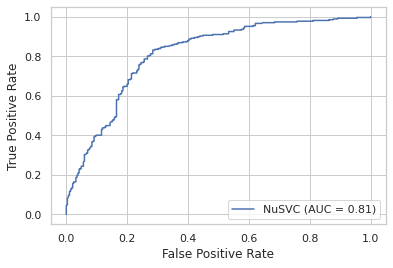

In [124]:
# ROC curve
import matplotlib.pyplot as plt
from sklearn.metrics import plot_roc_curve

plot_roc_curve(clf, X_test, y_test)  
plt.show()

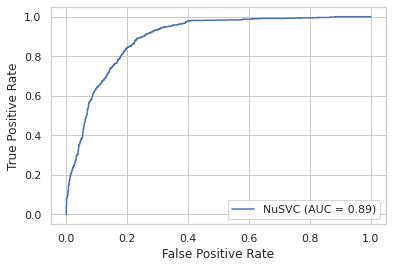

In [125]:
plot_roc_curve(clf, X_train, y_train)  
plt.show()